# Практична робота 3

Загальні завдання для всіх варіантів:
1. Завантажте набір даних. Скільки всього записів у ряді?
2. Виведіть заголовок та останні 5 записів таблиці.
3. Побудуйте графік часового ряду.
4. Проаналізуйте ряд, відповівши на 4 питання:
a. Чи є тренд?
b. Чи є сезонність?
c. Чи змінює ряд свій характер?
d. Чи є викиди або пропущені дані?
5. Виконайте перетворення даних для формування навчальної
таблиці. Врахуйте сезонність (якщо вона є) для вибору кількості
стовпців.
6. Розділіть дані на предиктори Х та цілі Y.
7. Сформуйте навчальну та тестову множини.
8. Створіть та навчіть нейронну мережу для прогнозування.
9. Отримайте грубу оцінку роботи мережі на тестових даних.
10. Отримайте реальну оцінку роботи мережі на тестових даних.
11. Побудуйте суміщений графік, на якому має бути відображено:
    - a. відрізок ряду з навчальних (початкових) даних;
    - b. відрізок ряду, отриманий за допомогою опрацювання
    навчальних даних нейронною мережею;
    - c. відрізок ряду, який відповідає реальним (початковим) даним
    на тестовій множині;
    - d. відрізок ряду, який відповідає грубому прогнозу мережі на
    тестовій множині;
    - e. відрізок ряду, який відповідає реальному прогнозу мережі на
тестовій множині.
12. Використайте навчену мережу для отримання прогнозу на
вказаний термін часу.
13. Побудуйте суміщений графік початкового ряду та прогнозу.

Варіант 12

Набір даних: продаж і пива в США (Beer.csv).

Опис даних: В наборі містяться дані про щомісячний обсяг продажів пива в США.

Необхідно зробити прогноз обсягів продажів на наступні місяці.

Термін прогнозу: 6 місяців.

In [1]:
# 1. Імпорт бібліотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Налаштування стилю графіків
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
# 2. Завантаження та первинний аналіз даних
df = df = pd.read_csv('Beer.csv', parse_dates=['date'], index_col='date')
print(f"Всього записів: {df.shape[0]}")
print("Head:", df.head(), "Tail:", df.tail(), sep='\n')

Всього записів: 324
Head:
            beer
date            
1992-01-01  1509
1992-02-01  1541
1992-03-01  1597
1992-04-01  1675
1992-05-01  1822
Tail:
            beer
date            
2018-08-01  4898
2018-09-01  4598
2018-10-01  4737
2018-11-01  5130
2018-12-01  6370


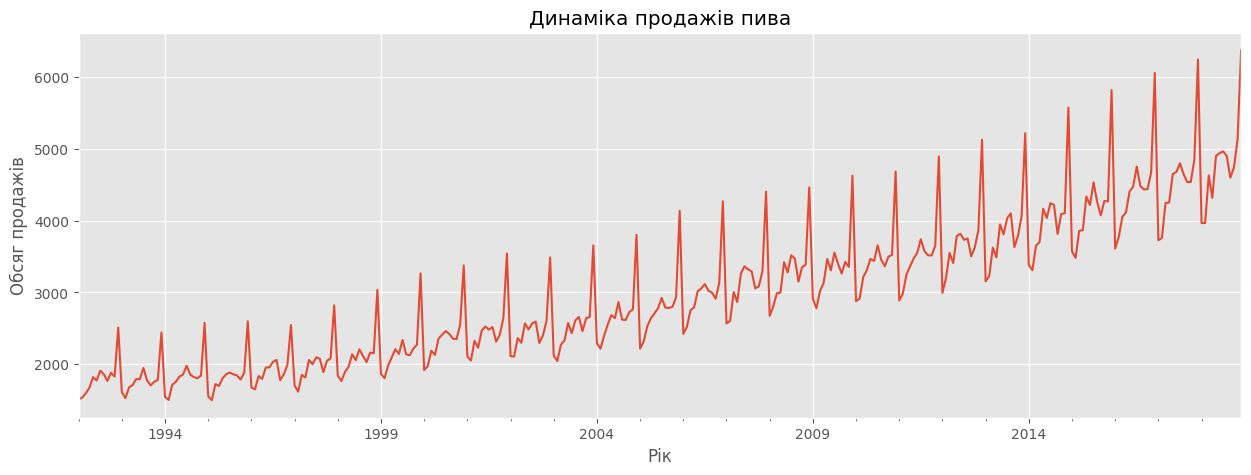

In [3]:
# 3. Побудова графіка та аналіз ряду

df.iloc[:, 0].plot()

plt.title('Динаміка продажів пива')
plt.ylabel('Обсяг продажів')
plt.xlabel('Рік')
plt.show()

In [4]:
# 4. Підготовка даних
df['log_y'] = np.log10(df.iloc[:, 0])

df_processed = pd.DataFrame(index=df.index) # Зберігаємо індекс дат

for i in range(12, 0, -1):
    df_processed[f't-{i}'] = df['log_y'].shift(i)

df_processed['t'] = df['log_y'].values

df_final = df_processed.dropna()

print(df_final.head())

                t-12      t-11      t-10       t-9       t-8       t-7  \
date                                                                     
1993-01-01  3.178689  3.187803  3.203305  3.224015  3.260548  3.249198   
1993-02-01  3.187803  3.203305  3.224015  3.260548  3.249198  3.281488   
1993-03-01  3.203305  3.224015  3.260548  3.249198  3.281488  3.269980   
1993-04-01  3.224015  3.260548  3.249198  3.281488  3.269980  3.247973   
1993-05-01  3.260548  3.249198  3.281488  3.269980  3.247973  3.274620   

                 t-6       t-5       t-4       t-3       t-2       t-1  \
date                                                                     
1993-01-01  3.281488  3.269980  3.247973  3.274620  3.262688  3.399847   
1993-02-01  3.269980  3.247973  3.274620  3.262688  3.399847  3.207904   
1993-03-01  3.247973  3.274620  3.262688  3.399847  3.207904  3.184407   
1993-04-01  3.274620  3.262688  3.399847  3.207904  3.184407  3.224792   
1993-05-01  3.262688  3.399847  3.207

In [5]:
# 5. Розподіл на навчальну та тестову вибірки
X = df_final.drop('t', axis=1)
y = df_final['t']

test_len = 12
train_len = len(df_final) - test_len

X_train = X.iloc[:train_len]
y_train = y.iloc[:train_len]
X_test = X.iloc[train_len:]
y_test = y.iloc[train_len:]

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")

Shape X_train: (300, 12)
Shape X_test: (12, 12)


In [6]:
# 6. Створення та навчання нейронної мережі
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

history = model.fit(X_train, y_train, epochs=300, batch_size=None, verbose=1)

print("Навчання завершено.")
print(f"Final Loss: {history.history['loss'][-1]}")

Epoch 1/300
10/10 [==============================] - 2s 4ms/step - loss: 15.3212 - mean_absolute_percentage_error: 113.2581
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 9.4177 - mean_absolute_percentage_error: 88.7015
Epoch 3/300
10/10 [==============================] - 0s 25ms/step - loss: 5.1826 - mean_absolute_percentage_error: 65.6884
Epoch 4/300
10/10 [==============================] - 0s 5ms/step - loss: 2.4821 - mean_absolute_percentage_error: 45.3081
Epoch 5/300
10/10 [==============================] - 0s 5ms/step - loss: 0.9858 - mean_absolute_percentage_error: 28.3376
Epoch 6/300
10/10 [==============================] - 0s 6ms/step - loss: 0.2975 - mean_absolute_percentage_error: 15.3811
Epoch 7/300
10/10 [==============================] - 0s 16ms/step - loss: 0.0616 - mean_absolute_percentage_error: 6.4888
Epoch 8/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0088 - mean_absolute_percentage_error: 2.2059
Epoch 9/300
10/10 [===

In [7]:
# 7. Оцінка якості (Валідація)
def make_prediction(X_predict, nb_of_predictions, model):
    predictions = np.array([])
    current_X = X_predict.values if hasattr(X_predict, 'values') else X_predict
    current_X = current_X.copy()
    
    for _ in range(nb_of_predictions):
        y_predicted = model.predict(current_X, verbose=0)
        
        predicted_scalar = y_predicted.item()
        
        predictions = np.append(predictions, predicted_scalar)
        
        current_X = np.roll(current_X, -1)
        current_X[0, -1] = predicted_scalar 
        
    return predictions

X_start_test = X_test.iloc[0:1]

predictions_log = make_prediction(X_start_test, len(X_test), model)

y_test_real = 10**y_test
predictions_real = 10**predictions_log

mape = 100 * np.mean(np.abs((y_test_real - predictions_real) / y_test_real))
print(f"\nMAPE на тестовій вибірці: {mape:.2f}%")


MAPE на тестовій вибірці: 9.18%


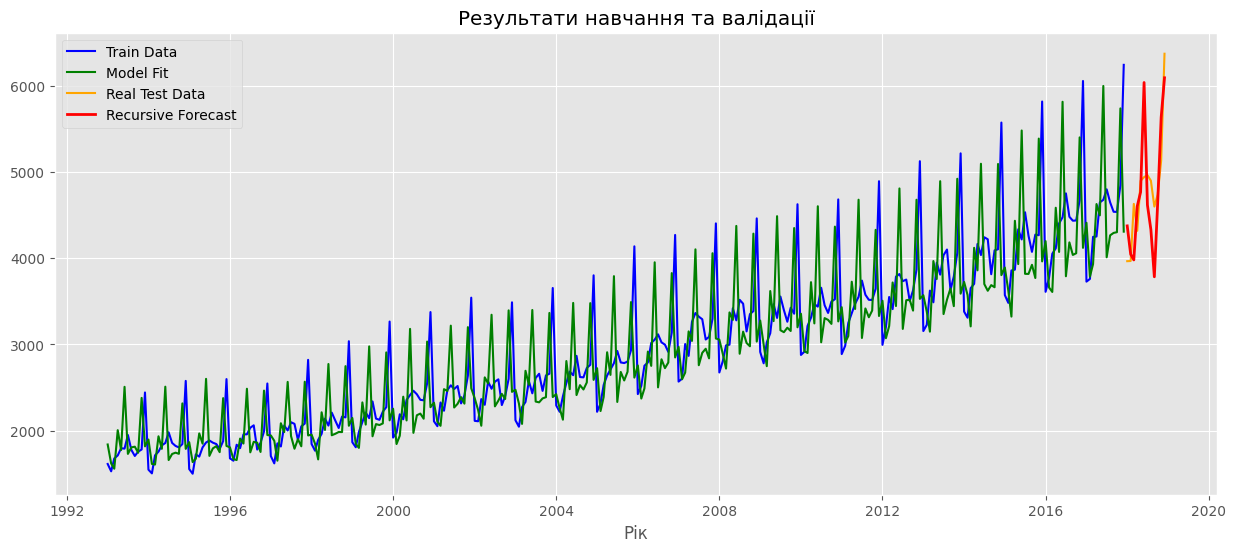

In [8]:
# 8. Візуалізація результатів валідації
y_train_real = 10**y_train
pred_train_real = 10**model.predict(X_train, verbose=0).flatten()

plt.figure(figsize=(15, 6))

plt.plot(y_train.index, y_train_real, color='blue', label='Train Data')
plt.plot(y_train.index, pred_train_real, color='green', label='Model Fit')
plt.plot(y_test.index, y_test_real, color='orange', label='Real Test Data')
plt.plot(y_test.index, predictions_real, color='red', linewidth=2, label='Recursive Forecast')

plt.legend()
plt.title('Результати навчання та валідації')
plt.xlabel('Рік')
plt.show()

In [9]:
# 9. Фінальний прогноз на 6 місяців
forecast_horizon = 6

# Останні відомі 12 місяців для старту (беремо останній рядок X з усього датасету)
last_known_window = X.iloc[-1:].values.reshape(1, 12)

# Прогноз
future_predictions_log = make_prediction(last_known_window, forecast_horizon, model)
future_predictions_real = 10**future_predictions_log

print(f"Прогноз на наступні {forecast_horizon} місяців:")
for i, pred in enumerate(future_predictions_real, 1):
    future_date = df.index[-1] + pd.DateOffset(months=i)
    print(f"{future_date.date()}: {pred:.2f}")


Прогноз на наступні 6 місяців:
2019-01-01: 4573.77
2019-02-01: 4245.66
2019-03-01: 4590.30
2019-04-01: 4473.14
2019-05-01: 4879.00
2019-06-01: 5271.29


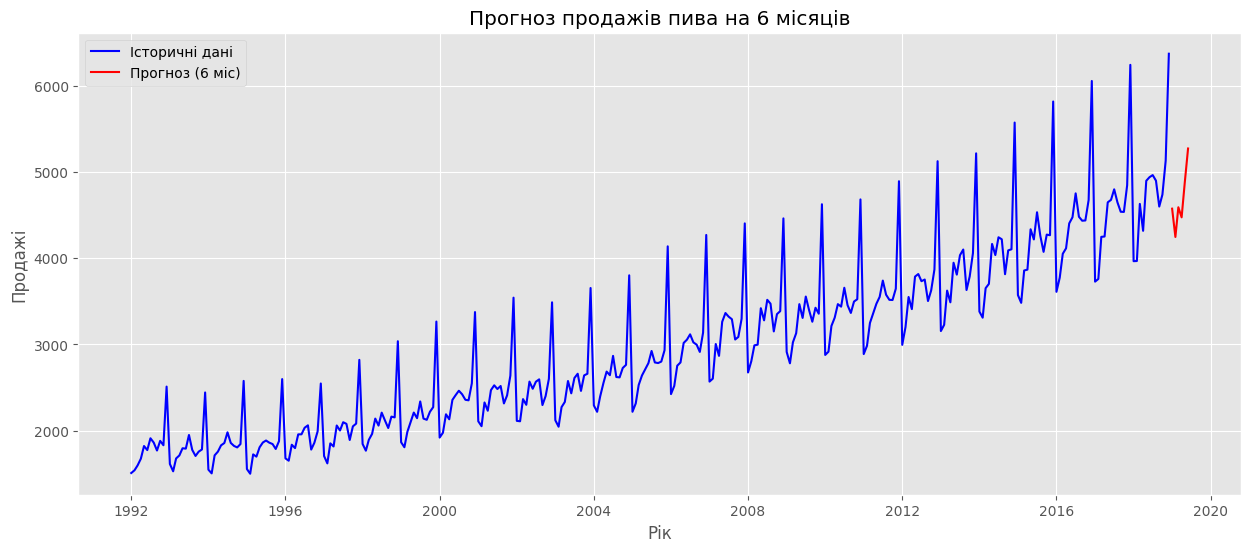

In [10]:
# 10. Фінальний графік з прогнозом
y_full_real = 10**df['log_y']

last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_horizon + 1, freq='MS')[1:]

plt.figure(figsize=(15, 6))
plt.plot(y_full_real.index, y_full_real, color='blue', label='Історичні дані')
plt.plot(future_dates, future_predictions_real, color='red', 
         label=f'Прогноз ({forecast_horizon} міс)')

plt.title('Прогноз продажів пива на 6 місяців')
plt.xlabel('Рік')
plt.ylabel('Продажі')
plt.legend()
plt.show()